In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Create Plot

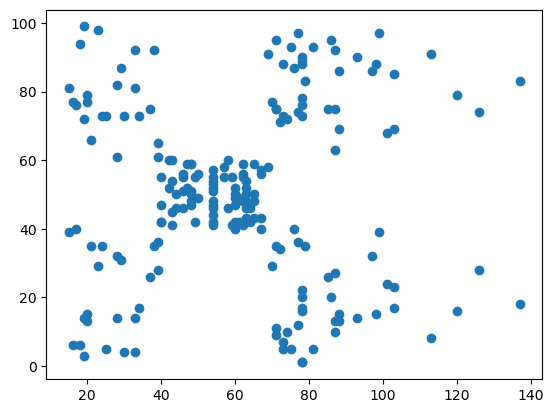

In [3]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.show()

# Finding optimal number of clusters

In [4]:
x = df[['Annual Income (k$)','Spending Score (1-100)']]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,12):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

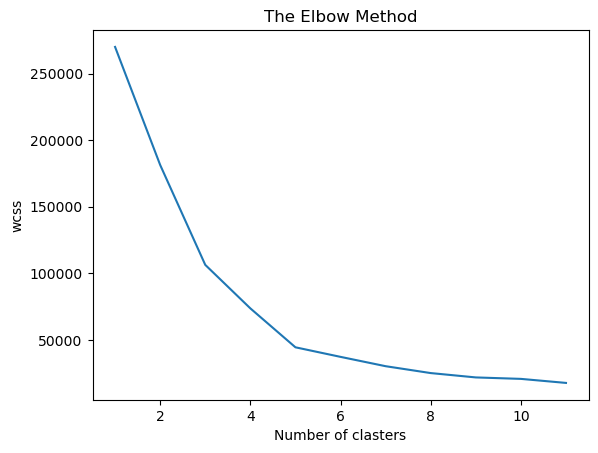

In [10]:
plt.plot(range(1,12),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clasters')
plt.ylabel('wcss')
plt.show()

# Fitting K-means to the dataset

In [11]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(x)

In [8]:
df1 = y_kmeans
df1

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [9]:
ser1 = pd.Series(y_kmeans,name='clusters')
ser1

0      2
1      3
2      2
3      3
4      2
      ..
195    4
196    1
197    4
198    1
199    4
Name: clusters, Length: 200, dtype: int32

In [10]:
clusters_df = pd.concat([df,ser1],axis=1)
clusters_df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


In [11]:
clusters_df.clusters.value_counts()

0    81
4    39
1    35
2    23
3    22
Name: clusters, dtype: int64

# Splitting Clusters

In [12]:
cluster1 = clusters_df[clusters_df.clusters==0]
cluster2 = clusters_df[clusters_df.clusters==1]
cluster3 = clusters_df[clusters_df.clusters==2]
cluster4 = clusters_df[clusters_df.clusters==3]
cluster5 = clusters_df[clusters_df.clusters==4]

print(cluster1)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
43           44  Female   31                  39                      61   
46           47  Female   50                  40                      55   
47           48  Female   27                  40                      47   
48           49  Female   29                  40                      42   
49           50  Female   31                  40                      42   
..          ...     ...  ...                 ...                     ...   
121         122  Female   38                  67                      40   
122         123  Female   40                  69                      58   
126         127    Male   43                  71                      35   
132         133  Female   25                  72                      34   
142         143  Female   28                  76                      40   

     clusters  
43          0  
46          0  
47          0  
48          0  
49     

In [13]:
cluster2

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
124,125,Female,23,70,29,1
128,129,Male,59,71,11,1
130,131,Male,47,71,9,1
134,135,Male,20,73,5,1
136,137,Female,44,73,7,1
138,139,Male,19,74,10,1
140,141,Female,57,75,5,1
144,145,Male,25,77,12,1
146,147,Male,48,77,36,1
148,149,Female,34,78,22,1


In [14]:
cluster2.shape

(35, 6)

In [15]:
cluster3

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,2
2,3,Female,20,16,6,2
4,5,Female,31,17,40,2
6,7,Female,35,18,6,2
8,9,Male,64,19,3,2
10,11,Male,67,19,14,2
12,13,Female,58,20,15,2
14,15,Male,37,20,13,2
16,17,Female,35,21,35,2
18,19,Male,52,23,29,2


In [16]:
cluster3.shape

(23, 6)

In [17]:
cluster4

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
1,2,Male,21,15,81,3
3,4,Female,23,16,77,3
5,6,Female,22,17,76,3
7,8,Female,23,18,94,3
9,10,Female,30,19,72,3
11,12,Female,35,19,99,3
13,14,Female,24,20,77,3
15,16,Male,22,20,79,3
17,18,Male,20,21,66,3
19,20,Female,35,23,98,3


In [18]:
cluster4.shape

(22, 6)

In [19]:
cluster5

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
123,124,Male,39,69,91,4
125,126,Female,31,70,77,4
127,128,Male,40,71,95,4
129,130,Male,38,71,75,4
131,132,Male,39,71,75,4
133,134,Female,31,72,71,4
135,136,Female,29,73,88,4
137,138,Male,32,73,73,4
139,140,Female,35,74,72,4
141,142,Male,32,75,93,4


In [20]:
cluster5.shape

(39, 6)

# Create plot

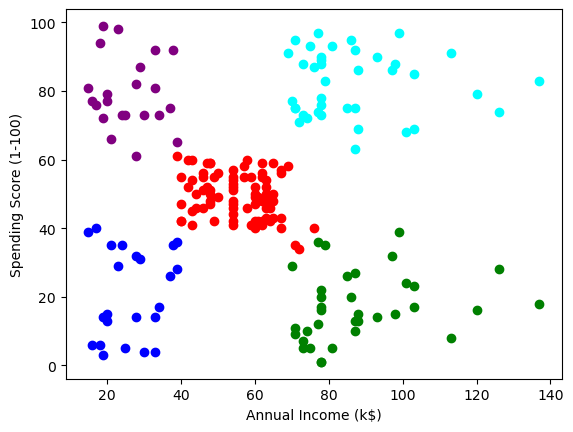

In [21]:
plt.scatter(cluster1['Annual Income (k$)'],cluster1['Spending Score (1-100)'],color='red')
plt.scatter(cluster2['Annual Income (k$)'],cluster2['Spending Score (1-100)'],color='green')
plt.scatter(cluster3['Annual Income (k$)'],cluster3['Spending Score (1-100)'],color='blue')
plt.scatter(cluster4['Annual Income (k$)'],cluster4['Spending Score (1-100)'],color='purple')
plt.scatter(cluster5['Annual Income (k$)'],cluster5['Spending Score (1-100)'],color='cyan')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# hierarchical

In [23]:
df2 = pd.read_csv('Mall_Customers.csv')
df2

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [24]:
x = df2.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# creating a dendrogram

In [31]:
from scipy.cluster import hierarchy
import scipy.cluster.hierarchy as sch

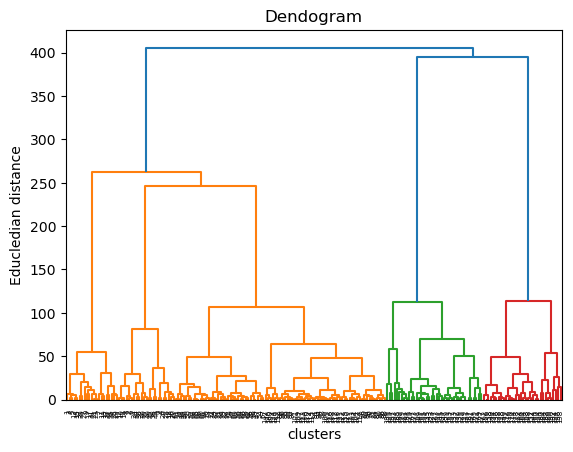

In [34]:
dendrogram = sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendogram')
plt.xlabel('clusters')
plt.ylabel('Educledian distance')
plt.show()

# Fitting hierarchical clustering to the dataset

In [36]:
from sklearn.cluster import AgglomerativeClustering

In [46]:
hc = AgglomerativeClustering (n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)
y_hc

C:\Users\agraw\anaconda3\sanjeet agrawal\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [48]:
x[y_hc==0,0]

array([ 71,  71,  73,  73,  74,  75,  77,  78,  78,  78,  78,  78,  78,
        81,  85,  86,  87,  87,  87,  88,  88,  93,  97,  98,  99, 101,
       103, 103, 113, 120, 126, 137], dtype=int64)

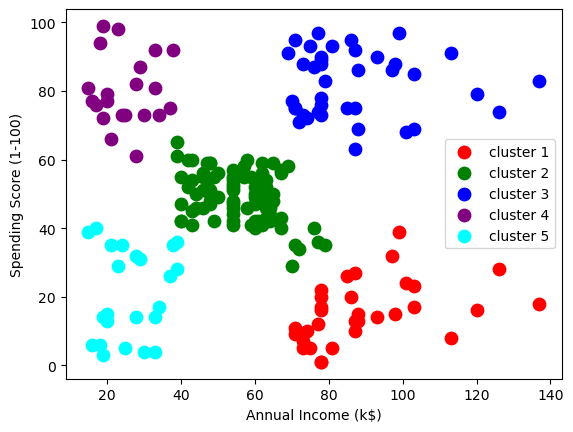

In [51]:
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=80,c='red',label='cluster 1')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=80,c='green',label='cluster 2')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=80,c='blue',label='cluster 3')
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=80,c='purple',label='cluster 4')
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],s=80,c='cyan',label='cluster 5')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()